# Classification Test 3


- S&P500의 505개 주식 중, 2010년 부터 데이터를 얻을 수 있었던 453개 주식의 수익률을 가지고 Hyatt Hotel의 주가 수익률의 방향을 예측해보는 실험을 해보았다.
- 연구의 목적: Classification model 비교
- PCA-SVM, Random Forest, Gaussian Naive Bayesian, Decision Tree, Adaboost, Gradient Boost
XGboost

In [1]:
import numpy as np
import pandas as pd
!pip install -q yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = table['Symbol'].tolist()
print (tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'C

In [5]:
data = yf.download(tickers, start='2010-01-01',end='2019-08-07')

[*                      3%                       ]  15 of 505 downloaded

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 514, in _download_one_threaded
    period, interval, prepost, proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 527, in _download_one
    proxy=proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 348, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('BRK.B', 'No data found, symbol may be delisted')



[*******************   40%                       ]  203 of 505 downloaded

Exception in thread Thread-208:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 357, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 206, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 514, in _download_one_threaded
    period, interval, prepost, proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfin

[*********************100%***********************]  503 of 505 downloaded


In [19]:
close = data['Adj Close'][1:]
close = close.dropna(axis=0,how='all')
close.dropna(axis=1,inplace=True)
ret = close.pct_change()
ret = ret.dropna()
ret

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,...,UNP,UPS,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WCG,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WU,WY,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.011058,0.112583,-0.005833,0.001867,-0.007350,-0.024027,-0.008268,0.006149,0.016446,-0.001624,0.005663,-0.005415,0.001876,-0.015193,-0.003753,-0.011455,-0.010055,0.029431,-0.009958,-0.018902,0.024793,0.029839,-0.004969,0.029707,-0.001819,-0.026486,0.055696,0.016579,-0.014096,-0.007673,0.001031,-0.004334,0.008024,-0.008761,0.023270,0.016389,0.005900,-0.022401,0.010749,-0.006226,...,0.013816,0.001824,-0.010956,0.025364,-0.015014,-0.011526,0.014265,0.018981,0.002071,0.026379,-0.007543,0.006725,0.010471,-0.033002,0.004884,0.002048,0.000499,-0.013630,-0.007944,-0.001346,0.026495,-0.013506,0.014116,0.027307,-0.002002,-0.002224,-0.004732,0.012389,-0.009882,-0.004149,0.021211,0.060809,-0.001911,-0.011572,-0.012370,0.003900,-0.012001,0.001129,-0.003043,0.035628
2010-01-06,-0.003403,-0.041667,0.008673,-0.016027,-0.009146,-0.015240,0.005395,0.010477,-0.002122,-0.002033,-0.002816,-0.002382,0.004993,0.002373,-0.006997,0.010300,-0.010157,0.008259,0.003176,-0.006422,0.017742,-0.003132,0.000000,-0.008243,0.001823,-0.029428,-0.009592,0.000398,0.002523,-0.001718,-0.014418,0.001244,0.019605,-0.007365,0.013829,0.005202,-0.018116,-0.006645,0.016331,-0.000298,...,0.001603,-0.007510,0.000000,0.011053,-0.005317,-0.013326,0.006198,-0.003922,-0.004961,0.024922,-0.004092,0.013026,-0.010834,-0.017532,-0.011239,-0.028104,0.005985,0.001810,-0.007674,-0.011590,0.000798,0.010714,-0.004762,0.001375,-0.008794,0.016080,0.000000,0.032343,-0.002139,-0.000694,-0.011138,-0.013260,-0.001340,0.001377,-0.007014,0.008741,0.006681,-0.009024,-0.007121,0.086787
2010-01-07,-0.001463,0.028986,-0.000253,-0.001894,-0.016264,0.000000,0.008293,-0.000864,-0.019405,-0.007742,-0.010085,-0.000682,0.009315,0.005525,-0.009214,0.008496,0.000933,0.010712,-0.007916,-0.018929,0.037242,0.012176,-0.006242,0.000378,-0.006974,-0.002860,-0.004843,0.005169,0.003775,-0.011188,-0.010449,0.002484,-0.004482,-0.009328,0.007578,-0.002587,-0.017013,0.002537,0.037182,-0.002984,...,-0.008804,-0.007567,-0.013092,0.019261,0.004277,0.009004,-0.016584,0.019685,0.010386,0.007599,0.015556,-0.001649,-0.013810,-0.012610,0.011060,-0.005783,0.000992,0.004269,0.006052,0.013908,-0.019410,-0.002356,0.001840,0.036613,0.021479,-0.002977,0.002377,-0.006774,0.000476,0.031967,-0.004262,0.021501,-0.015910,-0.004127,-0.010091,-0.003081,0.013273,0.004553,-0.000512,0.112230
2010-01-08,0.000000,-0.018109,0.004048,0.006831,0.010724,-0.020238,0.005322,-0.004036,-0.005422,0.005749,-0.012632,-0.001365,0.010768,0.030612,-0.007112,0.011794,0.027959,-0.009975,-0.007181,0.026353,-0.023682,0.000776,0.003141,0.000000,0.014962,0.013196,-0.020681,0.004351,0.002089,0.039164,-0.004224,0.019207,-0.009294,0.008988,0.003610,0.002075,0.027077,0.006903,0.004324,0.008381,...,0.033912,0.048059,-0.022449,0.001532,0.002129,0.002789,0.001205,-0.005792,-0.005345,-0.014329,-0.011272,-0.012880,0.007726,-0.020000,-0.010939,0.000529,0.016345,0.000818,0.001337,-0.020979,0.004881,0.005903,-0.010287,-0.009272,0.021179,-0.001100,0.004348,0.007673,-0.004999,0.010101,-0.009172,-0.007286,0.018699,0.000691,0.014781,-0.004056,0.000000,-0.003399,0.000513,-0.016171
2010-01-11,0.000489,-0.020492,-0.009826,-0.009046,0.011494,-0.018226,0.004812,-0.000868,-0.013083,-0.005717,0.000413,0.004443,0.000913,-0.000381,0.008264,0.010408,0.006346,0.026448,0.009108,0.010087,0.007825,0.006979,0.001252,-0.003399,-0.004212,-0.006795,-0.004969,0.000000,-0.006255,0.021776,-0.030753,0.006079,0.006743,0.004454,0.012890,-0.009060,-0.024041,0.003885,0.005740,0.004156,...,-0.006638,0.044092,-0.029228,0.004589,0.021601,-0.002781,0.005294,-0.002913,0.004547,-0

In [21]:
# y data
h = yf.download('H',start='2010-01-01',end='2019-08-07')
h = h[['Adj Close']]
rety = h.pct_change().dropna()
rety

[*********************100%***********************]  1 of 1 downloaded


,Adj Close
Date,
2010-01-05,0.001352
2010-01-06,-0.009453
2010-01-07,0.005794
2010-01-08,-0.006100
2010-01-11,0.003409
2010-01-12,0.000680
2010-01-13,0.030221
2010-01-14,0.031312
2010-01-15,0.001598


In [23]:
target = pd.DataFrame({'Hyatt':np.where(rety['Adj Close'] >= 0, 1, -1)}, index = rety.index)
target.head()
target.shape

(2413, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ret, target, random_state=33, shuffle=False)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [0]:
from sklearn.model_selection import GridSearchCV

## SVM

In [0]:
from sklearn.svm import SVC

In [136]:
svc = SVC(kernel='rbf', class_weight='balanced')
svc = svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
yfit_svc = svc.predict(X_test)

In [145]:
svc_score = accuracy_score(y_test, yfit_svc)
svc_score

0.706953642384106

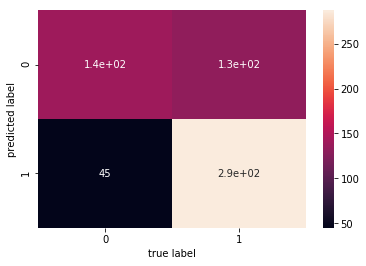

In [146]:
mat = confusion_matrix(y_test, yfit_svc)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [147]:
print(classification_report(y_test, yfit_svc))

              precision    recall  f1-score   support

          -1       0.76      0.51      0.61       272
           1       0.68      0.86      0.76       332

    accuracy                           0.71       604
   macro avg       0.72      0.69      0.69       604
weighted avg       0.72      0.71      0.70       604



## PCA-SVM Pipeline

In [0]:
from sklearn.decomposition import PCA 

In [0]:
pca = PCA().fit(ret)

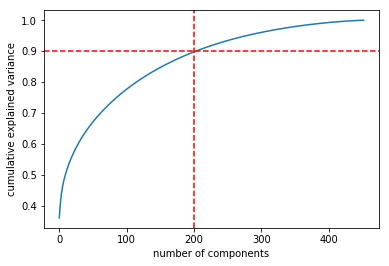

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.90, c='r', ls='--' )
plt.axvline(200, c='r', ls='--' )

In [0]:

from sklearn.pipeline import make_pipeline

In [0]:
pca = PCA(n_components=200, whiten=True, random_state=33)

model = make_pipeline(pca, svc)

In [0]:

param_grid = {'svc__C': [1, 5, 10, 50],
               'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_pca_svm = GridSearchCV(model, param_grid)


In [135]:
grid_pca_svm.fit(X_train,y_train)
yfit_ps = grid_pca_svm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [142]:
pca_svm_score = accuracy_score(y_test, yfit_ps)
pca_svm_score

0.7052980132450332

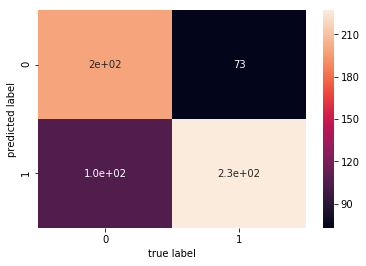

In [143]:
mat = confusion_matrix(y_test, yfit_ps)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [144]:
print(classification_report(y_test, yfit_ps))

              precision    recall  f1-score   support

          -1       0.65      0.73      0.69       272
           1       0.76      0.68      0.72       332

    accuracy                           0.71       604
   macro avg       0.71      0.71      0.70       604
weighted avg       0.71      0.71      0.71       604



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
param_grid2 = {'max_depth':[2,3,4,5,6,7]}
grid2 = GridSearchCV(clf_rf, param_grid2)
rf_best = grid.best_estimator_
yfit_rf_best = rf_best.predict(X_test)

In [78]:
yfit_rf = clf_rf.predict(X_test)
accuracy_score(y_test, yfit_rf)

0.6870860927152318

In [119]:
#Gridsearch
rf_score = accuracy_score(y_test, yfit_rf_best)
rf_score

0.7052980132450332

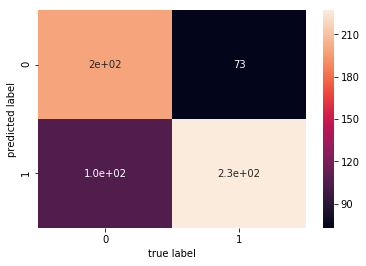

In [120]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit_rf_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [121]:
print(classification_report(y_test, yfit_rf_best))

              precision    recall  f1-score   support

          -1       0.65      0.73      0.69       272
           1       0.76      0.68      0.72       332

    accuracy                           0.71       604
   macro avg       0.71      0.71      0.70       604
weighted avg       0.71      0.71      0.71       604



## Gaussian Naive Bayesian

In [82]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
modelgnb.fit(X_train, y_train);
yfit_gnb = modelgnb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:

gnb_score = accuracy_score(y_test, yfit_gnb)
gnb_score

0.6854304635761589

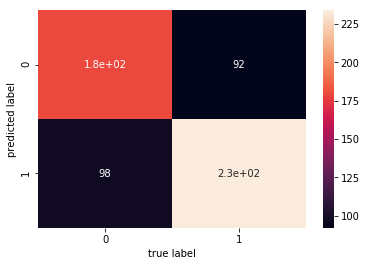

In [84]:
mat = confusion_matrix(y_test, yfit_gnb)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [85]:
print(classification_report(y_test, yfit_gnb))

              precision    recall  f1-score   support

          -1       0.65      0.66      0.65       272
           1       0.72      0.70      0.71       332

    accuracy                           0.69       604
   macro avg       0.68      0.68      0.68       604
weighted avg       0.69      0.69      0.69       604



## Boosting

## Ada-boosting

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=50,  learning_rate=0.1)
abc.fit(X_train, y_train)
yfit_abc = abc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:

abc_score = accuracy_score(y_test, yfit_abc)
abc_score

0.6241721854304636

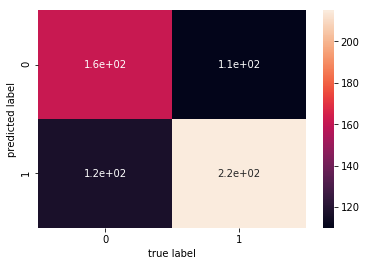

In [163]:
mat = confusion_matrix(y_test, yfit_abc)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [164]:
print(classification_report(y_test, yfit_abc))

              precision    recall  f1-score   support

          -1       0.58      0.60      0.59       272
           1       0.66      0.65      0.65       332

    accuracy                           0.62       604
   macro avg       0.62      0.62      0.62       604
weighted avg       0.63      0.62      0.62       604



## Gradient Boosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier( n_estimators=120, max_depth=2)
gbc.fit(X_train, y_train)
yfit_gbc = gbc.predict(X_test)

accuracy_score(y_test, yfit_gbc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7549668874172185

In [166]:
from sklearn.metrics import mean_squared_error
err = [mean_squared_error(y_test, yhat) for yhat in gbc.staged_predict(X_test)]
idx = np.argmin(err)
idx

19

In [167]:
gbc_best = GradientBoostingClassifier( n_estimators=19, max_depth=2)
gbc_best.fit(X_train, y_train)
yfit_gbc_best = gbc_best.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
#best hyperparameter
gbc_score = accuracy_score(y_test, yfit_gbc_best)
gbc_score


0.7698675496688742

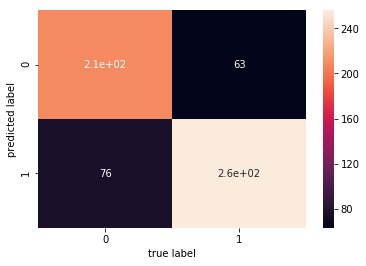

In [169]:
mat = confusion_matrix(y_test, yfit_gbc_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [170]:
print(classification_report(y_test, yfit_gbc_best))

              precision    recall  f1-score   support

          -1       0.73      0.77      0.75       272
           1       0.80      0.77      0.79       332

    accuracy                           0.77       604
   macro avg       0.77      0.77      0.77       604
weighted avg       0.77      0.77      0.77       604



## Single Decision Tree Model

In [171]:
params = {'max_depth': [2,3,4,5,6]}
dtc_grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [172]:
dtc_grid.fit(X_train, y_train)
dtc_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [173]:
yfit_dtc_best = dtc_grid.best_estimator_.predict(X_test)
tree_score = accuracy_score(yfit_dtc_best, y_test)
tree_score
#not bad at all

0.7566225165562914

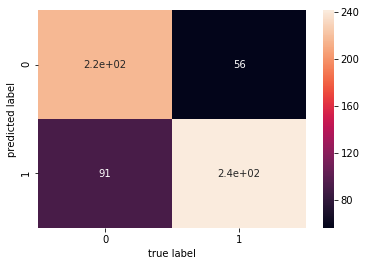

In [174]:
mat = confusion_matrix(y_test, yfit_dtc_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [175]:
print(classification_report(y_test, yfit_dtc_best))

              precision    recall  f1-score   support

          -1       0.70      0.79      0.75       272
           1       0.81      0.73      0.77       332

    accuracy                           0.76       604
   macro avg       0.76      0.76      0.76       604
weighted avg       0.76      0.76      0.76       604



## XGBoost

In [0]:
from xgboost import XGBClassifier

In [177]:
xgb = XGBClassifier(n_estimators=100)
xgb = xgb.fit(X_train, y_train)
yfit_xgb = xgb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
xgb_score = accuracy_score(yfit_xgb, y_test)
xgb_score

0.7582781456953642

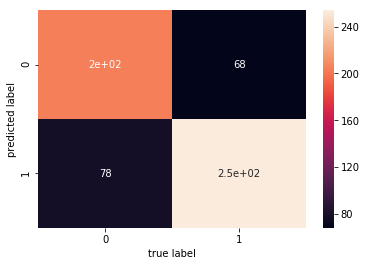

In [179]:
mat = confusion_matrix(y_test, yfit_xgb)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [186]:
print(classification_report(y_test, yfit_xgb))

              precision    recall  f1-score   support

          -1       0.72      0.75      0.74       272
           1       0.79      0.77      0.78       332

    accuracy                           0.76       604
   macro avg       0.76      0.76      0.76       604
weighted avg       0.76      0.76      0.76       604



In [187]:
xgb2 = XGBClassifier(ax_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
xgb2 = xgb2.fit(X_train, y_train)
yfit_xgb_2 = xgb2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
accuracy_score(y_test,yfit_xgb_2)

0.7582781456953642

## KNN (K-Nearest Neighbors)

In [181]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
yfit_knn = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [182]:
knn_score = accuracy_score(yfit_knn, y_test)
knn_score

0.5993377483443708

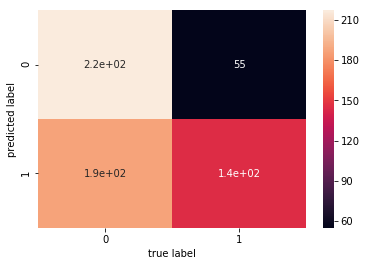

In [183]:
mat = confusion_matrix(y_test, yfit_knn)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [185]:
print(classification_report(y_test, yfit_knn))

              precision    recall  f1-score   support

          -1       0.54      0.80      0.64       272
           1       0.72      0.44      0.55       332

    accuracy                           0.60       604
   macro avg       0.63      0.62      0.59       604
weighted avg       0.64      0.60      0.59       604



## MPC (Multilayer Perceptron)

In [194]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs')
mlp = mlp.fit(X_train, y_train)
yfit_mlp = mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
mlp_score = accuracy_score(yfit_mlp, y_test)
mlp_score

0.7168874172185431

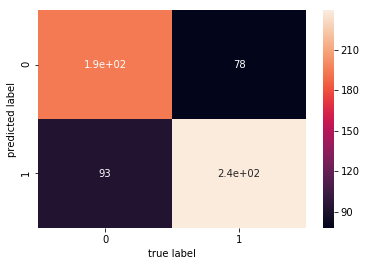

In [196]:
mat = confusion_matrix(y_test, yfit_mlp)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [197]:
print(classification_report(y_test, yfit_mlp))

              precision    recall  f1-score   support

          -1       0.68      0.71      0.69       272
           1       0.75      0.72      0.74       332

    accuracy                           0.72       604
   macro avg       0.71      0.72      0.72       604
weighted avg       0.72      0.72      0.72       604



## Deep Neural Network

In [258]:
# tensorflow 활용
import tensorflow as tf
tf.version

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/version/__init__.py'>

In [260]:
tf.keras

<module 'tensorflow.python.keras.api._v1.keras' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v1/keras/__init__.py'>

In [213]:

feature_columns = ret.columns
feature_columns

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'WY', 'WYNN', 'XEC', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'YUM',
       'ZION'],
      dtype='object', length=453)

In [236]:
dnn = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[1024, 512, 256],n_classes=4,optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.15,l1_regularization_strength=0.001))

W0808 08:37:22.916429 139923431298944 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpehkyhy1n


In [0]:
train = tf.estimator.inputs.pandas_input_fn( x = ret, y = target, shuffle=False)

In [257]:
target.dtypes

Hyatt    int64
dtype: object

In [246]:
dnn.train(input_fn = train,steps=2000)

TypeError: ignored

In [203]:
baseline.train(X_train,y_train)

ValueError: ignored

 # 부록 ( classification report) 
### from https://muthu.co/understanding-the-classification-report-in-sklearn/

what is that?

### Precision: What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

- TP – True Positives
- FP – False Positives

* Precision – Accuracy of positive predictions.
* Precision = TP/(TP + FP)

### Recall: What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

- FN – False Negatives

- Recall: Fraction of positives that were correctly identified.
- Recall = TP/(TP+FN)

### F1 score: What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- F1 Score = 2$*$(Recall $*$ Precision) / (Recall + Precision)

# 결론 (Classification Model Evaluation)